<a href="https://colab.research.google.com/github/thejacklerine/Mini-Project-Analysis-of-Global-CO-Emissions/blob/main/Code_co2_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("/content/sample_data/owid-co2-data.csv")
df.head(10)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1755,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,1756,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1757,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1758,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1759,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 3: Clean the data
df = df[df['iso_code'].apply(lambda x: isinstance(x, str) and len(x) == 3)]  # Only countries
df = df[df['year'] >= 1990]
df.head(10)

# Fill NaNs with 0 for numerical columns (like 'co2', 'population', etc.)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Optionally fill NaNs in non-numeric columns with 'Unknown' or forward-fill
df['country'] = df['country'].fillna('Unknown')
df.head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
240,Afghanistan,1990,AFG,12045664.0,1.306598e+10,0.046,0.004,2.024,-0.741,-26.784,...,0.0,0.094,0.0,0.0,0.001,0.0,13.892,4.218,0.0,0.0
241,Afghanistan,1991,AFG,12238879.0,1.204736e+10,0.046,0.004,1.914,-0.110,-5.435,...,0.0,0.092,0.0,0.0,0.001,0.0,14.178,4.207,0.0,0.0
242,Afghanistan,1992,AFG,13278982.0,1.267754e+10,0.046,0.003,1.482,-0.432,-22.580,...,0.0,0.090,0.0,0.0,0.001,0.0,12.514,3.853,0.0,0.0
243,Afghanistan,1993,AFG,14943174.0,9.834582e+09,0.047,0.003,1.487,0.005,0.330,...,0.0,0.089,0.0,0.0,0.001,0.0,11.804,4.021,0.0,0.0
244,Afghanistan,1994,AFG,16250799.0,7.919857e+09,0.047,0.003,1.454,-0.033,-2.227,...,0.0,0.087,0.0,0.0,0.001,0.0,12.282,4.159,0.0,0.0
245,Afghanistan,1995,AFG,17065836.0,1.230753e+10,0.047,0.003,1.417,-0.037,-2.511,...,0.0,0.085,0.0,0.0,0.001,0.0,13.319,4.321,0.0,0.0
246,Afghanistan,1996,AFG,17763265.0,1.207013e+10,0.047,0.003,1.370,-0.047,-3.332,...,0.0,0.084,0.0,0.0,0.001,0.0,15.723,4.425,0.0,0.0
247,Afghanistan,1997,AFG,18452100.0,1.185075e+10,0.047,0.003,1.304,-0.066,-4.814,...,0.0,0.083,0.0,0.0,0.001,0.0,18.584,4.466,0.0,0.0
248,Afghanistan,1998,AFG,19159996.0,1.169217e+10,0.047,0.002,1.279,-0.026,-1.967,...,0.0,0.082,0.0,0.0,0.001,0.0,17.581,4.528,0.0,0.0
249,Afghanistan,1999,AFG,19887791.0,1.151732e+10,0.047,0.002,1.092,-0.187,-14.616,...,0.0,0.082,0.0,0.0,0.001,0.0,19.208,4.431,0.0,0.0


/tmp/ipython-input-7-1671509309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_2021, x="country", y="co2", palette="Reds_r")


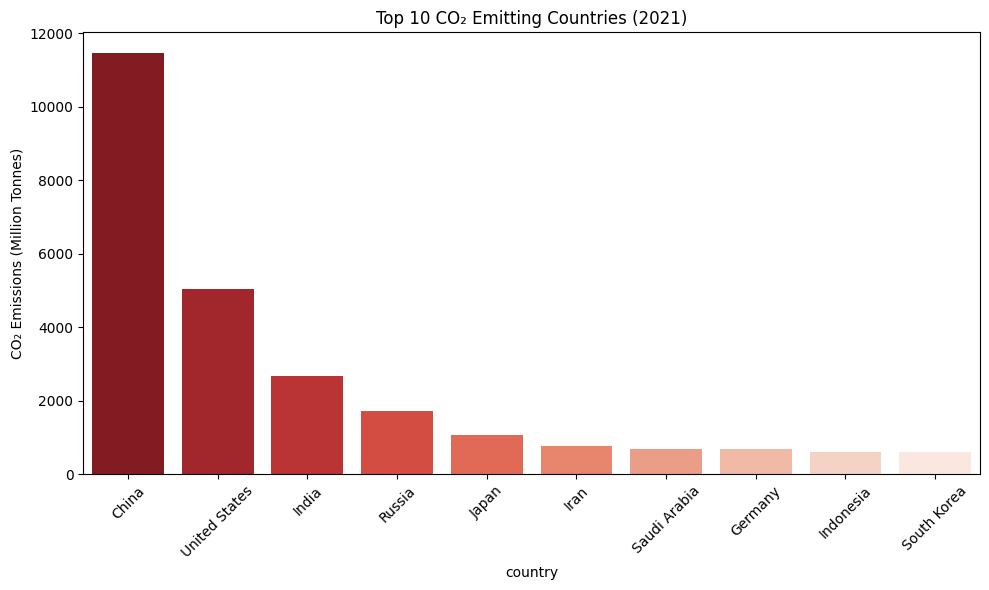

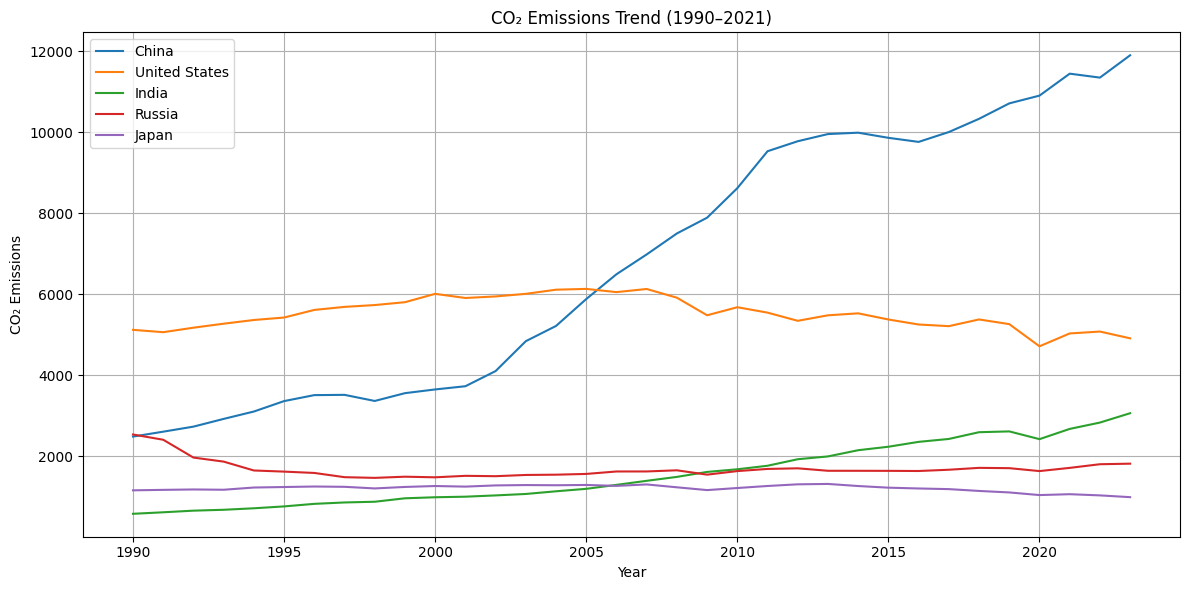

In [ ]:
# Step 4: Top emitters in 2021
top_2021 = df[df['year'] == 2021].sort_values(by="co2", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_2021, x="country", y="co2", palette="Reds_r")
plt.title("Top 10 CO₂ Emitting Countries (2021)")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Emissions trend for top 5 countries
top_countries = top_2021["country"].tolist()[:5]
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = df[df["country"] == country]
    plt.plot(country_data["year"], country_data["co2"], label=country)

plt.title("CO₂ Emissions Trend (1990–2021)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()